In [12]:
# https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C
import mglearn, sys, os, sklearn, math

from IPython.display import display
from scipy import sparse

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d

import seaborn as sns
import pandas as pd
import numpy as np
import graphviz

from sklearn.datasets import (load_breast_cancer,
                              load_boston,
                              make_blobs,
                              make_moons,
                              make_circles,
                              load_iris,
                              fetch_lfw_people,
                              load_digits)
from mglearn.datasets import make_wave, make_forge, load_extended_boston

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
mglearn.plots.plot_scaling()

In [18]:
cancer = load_breast_cancer()
xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state=1)
print(xtrain.shape)
print(xtest.shape)

(426, 30)
(143, 30)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(xtrain)

In [ ]:
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)
print(xtrain_scaled.shape)
print(xtrain.min(axis=0))
print(xtrain.max(axis=0))
print(xtrain_scaled.min(axis=0))
print(xtrain_scaled.max(axis=0))
print(xtest_scaled.min(axis=0))
print(xtest_scaled.max(axis=0))

In [13]:
scaler = StandardScaler()
xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state=1)
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.fit_transform(xtest)
print(xtrain_scaled.shape)
#print(xtrain.min(axis=0))
#print(xtrain.max(axis=0))
print(xtrain_scaled.min(axis=0))
print(xtrain_scaled.max(axis=0))
print(xtest_scaled.min(axis=0))
print(xtest_scaled.max(axis=0))

(426, 30)
[-1.98331111 -2.21220784 -1.94000195 -1.41936988 -3.17693457 -1.67256345
 -1.11319845 -1.24998427 -2.75560937 -1.85445424 -1.02191858 -1.4868881
 -1.02052074 -0.70421713 -1.71897011 -1.30222621 -1.07957012 -1.86438565
 -1.39523134 -1.04796104 -1.67939465 -2.17804228 -1.6511625  -1.18839672
 -2.74926775 -1.47787155 -1.32535194 -1.72016962 -2.27370502 -1.69959059]
[ 3.88701919  4.58624348  3.89224808  5.10812604  4.8514086   3.57547871
  4.25398267  3.90036693  4.54442389  4.85816459  8.49933194  6.27154538
  9.09260141 10.17583892  7.80808434  6.05382083 12.34448729  6.45179451
  5.26796545  9.17404056  3.95962531  3.80730971  4.15727317  5.68034656
  4.06936089  4.42564904  4.41644563  2.64688892  5.02374939  3.84309307]
[-1.97152273 -2.12411376 -1.93535426 -1.49588853 -1.87918441 -1.25253751
 -1.1199259  -1.29868883 -1.63208932 -1.63701528 -1.17342662 -1.81192985
 -1.08994235 -0.94577704 -1.55681662 -1.20259664 -0.99965001 -2.0923275
 -1.37321887 -1.27441424 -1.73086852 -2.0

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100, kernel='linear')
svm.fit(xtrain, ytrain)
print(svm.score(xtest, ytest))

0.958041958041958


In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)
svm.fit(xtrain_scaled, ytrain)
print(svm.score(xtest_scaled, ytest))

0.958041958041958


In [30]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)
svm.fit(xtrain_scaled, ytrain)
print(svm.score(xtest_scaled, ytest))

0.9440559440559441


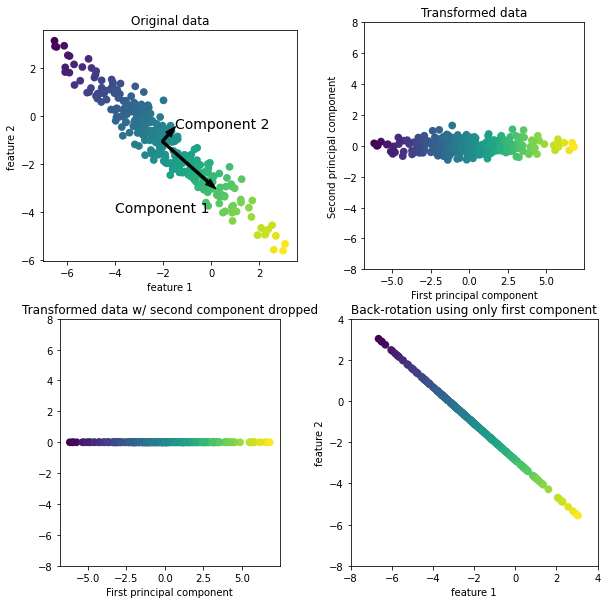

In [31]:
mglearn.plots.plot_pca_illustration()

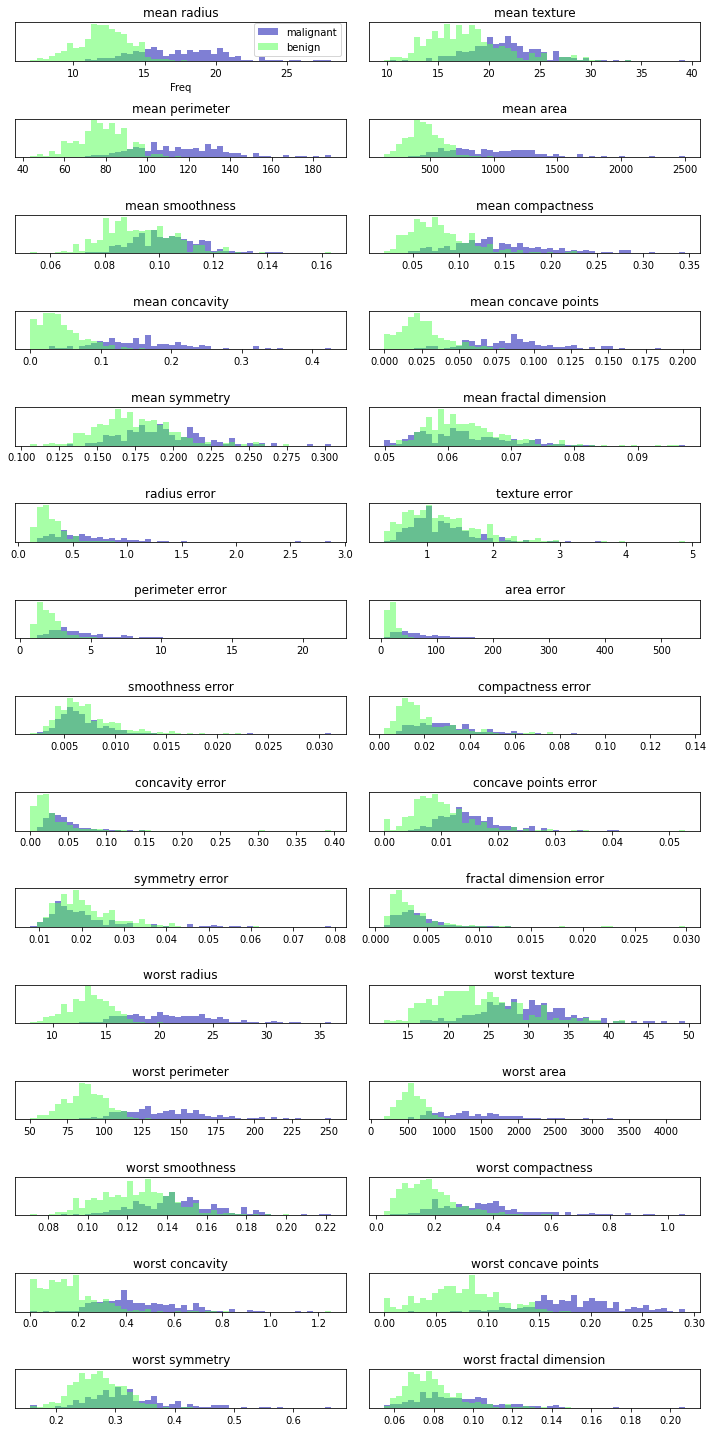

In [32]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
mal = cancer.data[cancer.target == 0]
ben = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(mal[:, i], bins=bins, color=mglearn.cm3(0), alpha = 0.5)
    ax[i].hist(ben[:, i], bins=bins, color=mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature mag')
ax[0].set_xlabel('Freq')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [2]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
xscaled = scaler.transform(cancer.data)

In [4]:
pca = PCA(n_components=2)
pca.fit(xscaled)
xpca = pca.transform(xscaled)
print(xscaled.shape)
print(xpca.shape)

(569, 30)
(569, 2)


Text(0, 0.5, '2nd')

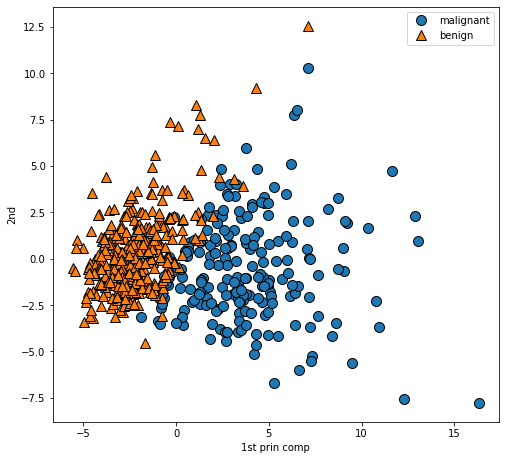

In [5]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(xpca[:, 0], xpca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('1st prin comp')
plt.ylabel('2nd')

In [7]:
print(pca.components_.shape)
print(pca.components_)

(2, 30)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

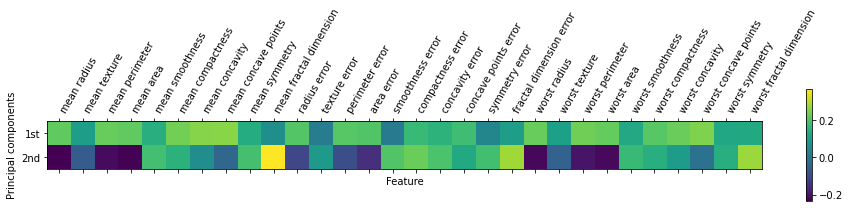

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['1st', '2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

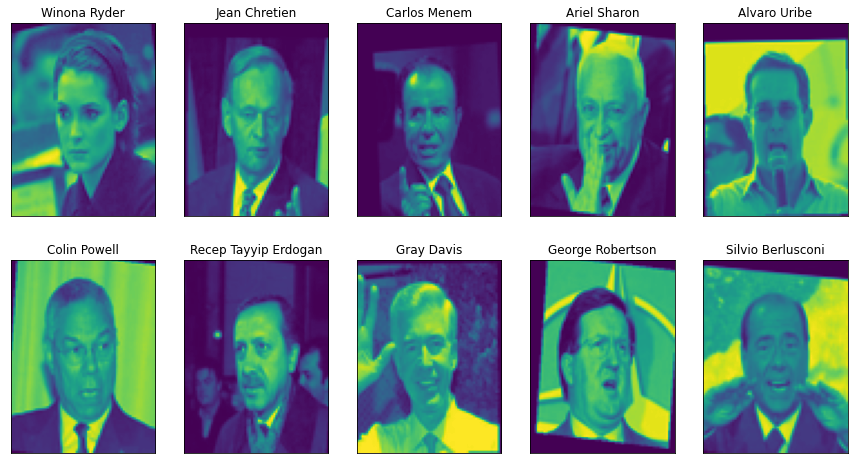

In [10]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [12]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [13]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='  ')
    if (i+1)%3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [20]:
mask = np.zeros(people.target.shape, dtype = bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

xp = people.data[mask]
yp = people.target[mask]
xp = xp/255

In [16]:
mglearn.plots.plot_pca_whitening()

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(xp, yp, stratify=yp, random_state=0)
pca = PCA(n_components=100, whiten=True, random_state=0).fit(xtrain)
xtrain_pca = pca.transform(xtrain)
xtest_pca = pca.transform(xtest)
print(xtrain_pca.shape)

(1547, 100)


In [ ]:
mglearn.plots.plot_pca_faces(xtrain, xtest, image_shape)

In [ ]:
mglearn.plots.plot_nmf_illustration()

In [ ]:
mglearn.plots.plot_nmf_faces(xtrain, xtest, image_shape)

In [ ]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(xtrain)
xtrain_nmf = nmf.transform(xtrain)
xest_nmf = nmf.transform(xtest)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))

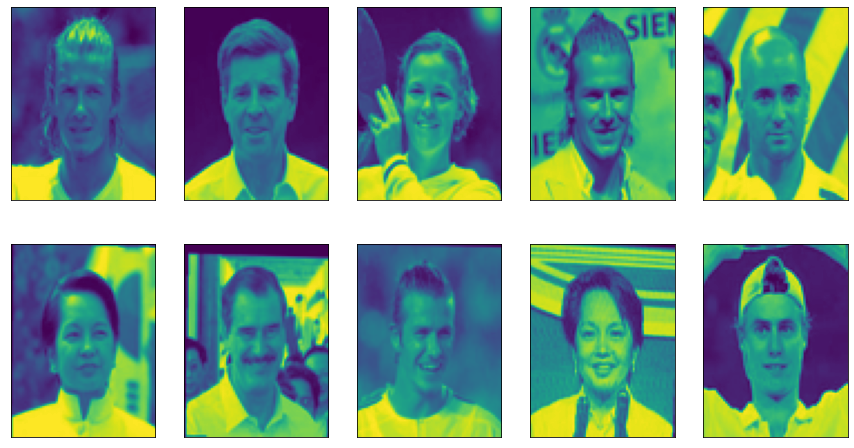

In [34]:
c = 1
inds = np.argsort(xtrain_nmf[:, c])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw = {'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(xtrain[ind].reshape(image_shape))
    
c = 2
inds = np.argsort(xtrain_nmf[:, c])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw = {'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(xtrain[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

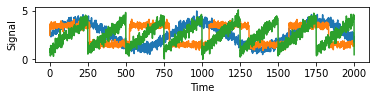

In [2]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [3]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(X.shape)

(2000, 100)


In [6]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(S_.shape)

(2000, 3)


In [7]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

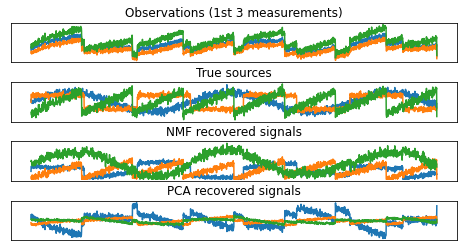

In [8]:
models = [X, S, S_, H]
names = ['Observations (1st 3 measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': 0.5},
                        subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

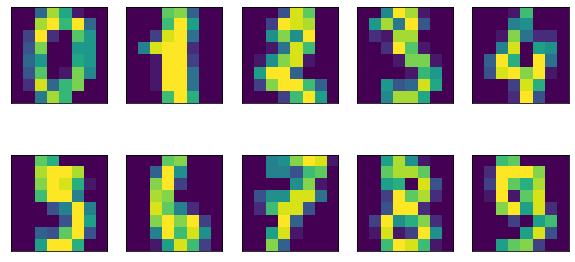

In [11]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '2nd')

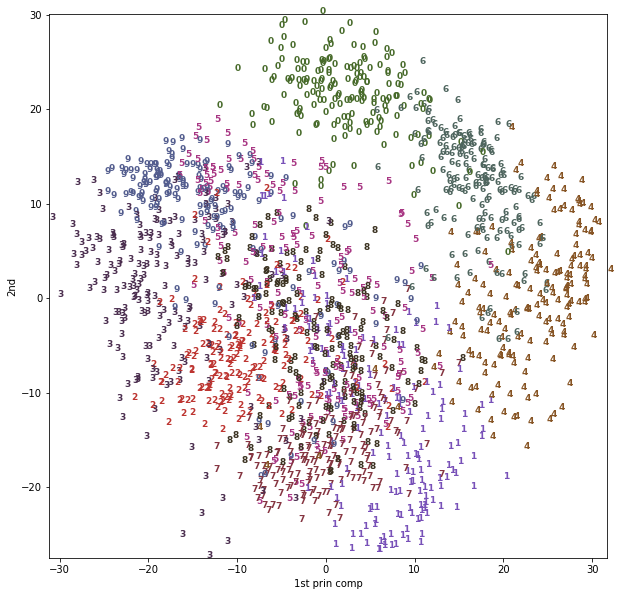

In [13]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight': 'bold', 'size': 9})
plt.xlabel('1st prin comp')
plt.ylabel('2nd')

Text(0.5, 0, 't-SNE feature 1')

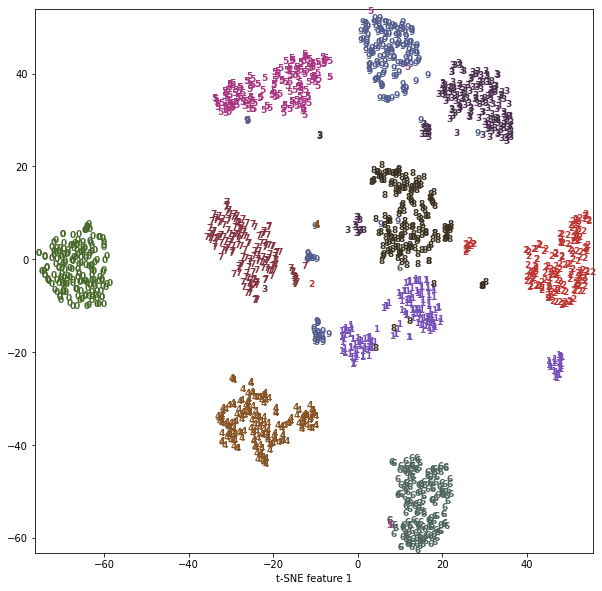

In [15]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight': 'bold', 'size': 9})

plt.xlabel('t-SNE feature 0')
plt.xlabel('t-SNE feature 1')

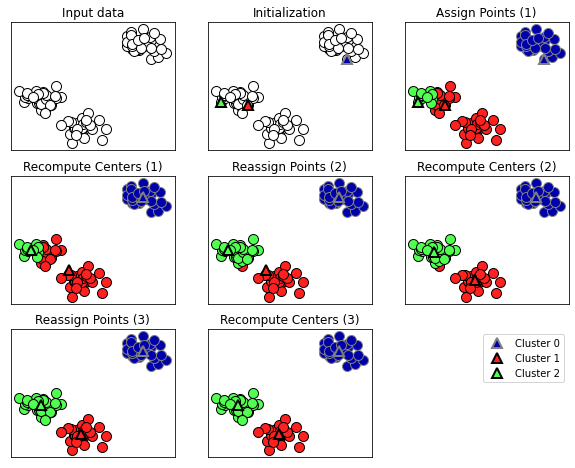

In [16]:
mglearn.plots.plot_kmeans_algorithm()

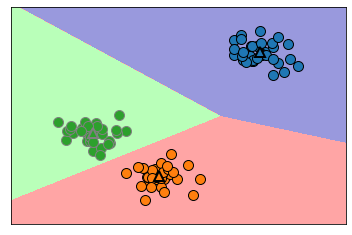

In [17]:
mglearn.plots.plot_kmeans_boundaries()

In [19]:
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [20]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


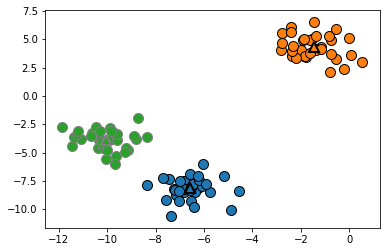

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                         [0, 1, 2], markers='^', markeredgewidth=2)

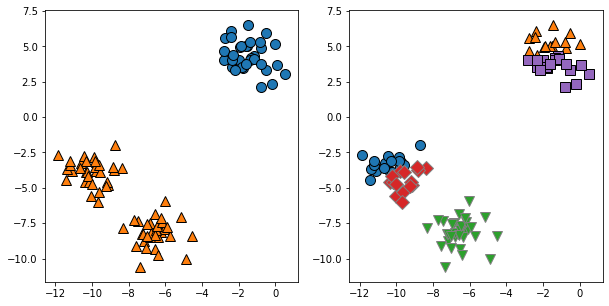

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'feature 1')

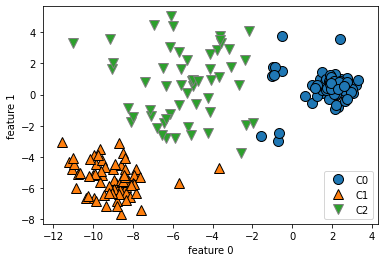

In [2]:
xvar, yvar = make_blobs(n_samples = 200, cluster_std=[1.0, 2.5, 0.5], random_state = 170)
ypred = KMeans(n_clusters = 3, random_state = 0).fit_predict(xvar)
mglearn.discrete_scatter(xvar[:, 0], xvar[:, 1], ypred)
plt.legend(['C0', 'C1', 'C2'], loc = 'best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

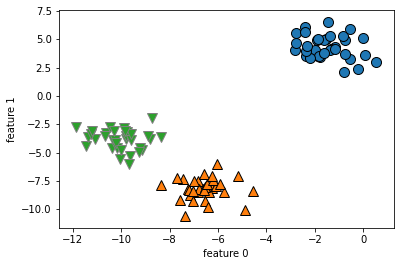

In [4]:
x, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], assignment)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [5]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0, 0.5, 'cluster dist')

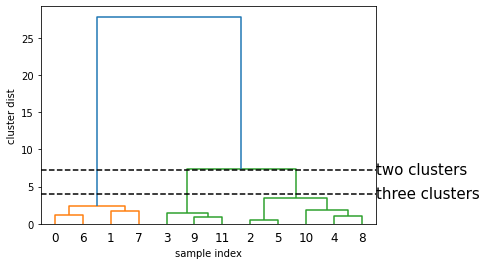

In [11]:
x, y = make_blobs(n_samples=12, random_state=1)
linkage_array = ward(x)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
#plt.figure()
plt.xlabel('sample index')
plt.ylabel('cluster dist')

In [13]:
from sklearn.cluster import DBSCAN
x, y = make_blobs(random_state=0, n_samples=12)

In [14]:
db = DBSCAN()
clusters = db.fit_predict(x)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [15]:
mglearn.plots.plot_dbscan()

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
